In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import pickle 
from matplotlib import pyplot as plt

In [3]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Techprocess Alternate")

In [4]:
df = pd.read_pickle(os.getcwd()+"\scored_cd_exi.pkl")

In [5]:
TIME_DECISION_DATE = "TIME_DECISION_DATE"
FINAL_SCORE = "XGB_SCORE"
RISK_SCORE = "RISK_SCORE"
COMBINED_SCORE = "COMBINED_SCORE"
TARGET = "RISK_FSTQPD30"
# PREDICTOR_LIST = ['G_RISK_FSTQPD30_SCORE', 'G_RISK_FPD10_SCORE','G_DEFAULT_FLAG_CHANGE_1']
df["MONTH"] = df[TIME_DECISION_DATE].dt.strftime("%y-%m")

In [6]:
df.head()

,SKP_CREDIT_CASE,TIME_DECISION_DATE,RISK_AGRF180,RISK_FPD30,RISK_FSPD30,RISK_FSTPD30,RISK_FSTQPD30,RISK_FSTQPD60,PRODUCT_GROUP,NTC_FLAG,...,WILLFULL DEFAULTS_REASON_5_ENCODED,DEBITED_REASON_6_ENCODED,Others_REASON_6_ENCODED,PROCESS ISSUE_REASON_6_ENCODED,WILLFULL DEFAULTS_REASON_6_ENCODED,XGB,XGB_SCORE,RISK_SCORE_LOG,XGB_SCORE_LOG,COMBINED_SCORE
0,285845893,2019-12-03,1,0,0,0,0,0,CD,Others,...,0,0,1,0,0,0.604005,0.604005,-4.169846,0.422180,0.044630
4,283214108,2019-11-15,1,0,0,0,0,0,CD,Others,...,0,1,0,0,0,0.451903,0.451903,-5.135782,-0.192985,0.010688
5,283214053,2019-11-15,1,0,0,0,0,0,CD,Others,...,0,0,1,0,0,0.534093,0.534093,-5.330482,0.136582,0.013095
8,283213660,2019-11-15,1,0,0,0,0,0,CD,Others,...,0,1,0,0,0,0.521814,0.521814,-3.353291,0.087312,0.058993
9,283213523,2019-11-15,1,0,0,0,0,0,CD,Others,...,0,1,0,0,0,0.451261,0.451261,-3.943537,-0.195576,0.027610


# GINI

### Gini Chart

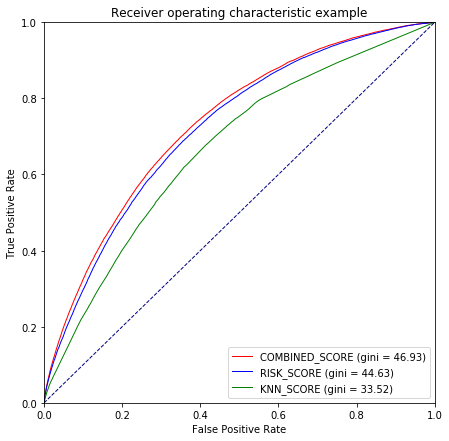

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(1, 1, 1)

lw = 1
fpr, tpr, thresholds = roc_curve(df[TARGET],df[COMBINED_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='red', lw=lw, label='COMBINED_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[RISK_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='blue', lw=lw, label='RISK_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[FINAL_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='green', lw=lw, label='KNN_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### MOM GINI

In [8]:
gini_dic = {}
for x in df["MONTH"].unique():
    try:
        if "MONTH" not in gini_dic:
            gini_dic["MONTH"] = []
        if FINAL_SCORE not in gini_dic: 
            gini_dic[FINAL_SCORE] = []
        if RISK_SCORE not in gini_dic: 
            gini_dic[RISK_SCORE] = []
        if COMBINED_SCORE not in gini_dic: 
            gini_dic[COMBINED_SCORE] = []
        
        gini_dic[FINAL_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][FINAL_SCORE])-1)*100)
        gini_dic[RISK_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][RISK_SCORE])-1)*100)
        gini_dic[COMBINED_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][COMBINED_SCORE])-1)*100)
        gini_dic["MONTH"].append(x)
#         for y in PREDICTOR_LIST:
#             if y not in gini_dic:
#                   gini_dic[y] = []
#             gini_dic[y].append(((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][y])-1)*100))
    except: 
        print("ERROR")

gini_df = pd.DataFrame(gini_dic)
gini_df.sort_values(by = "MONTH",inplace = True)
gini_df.reset_index(inplace = True)


ERROR


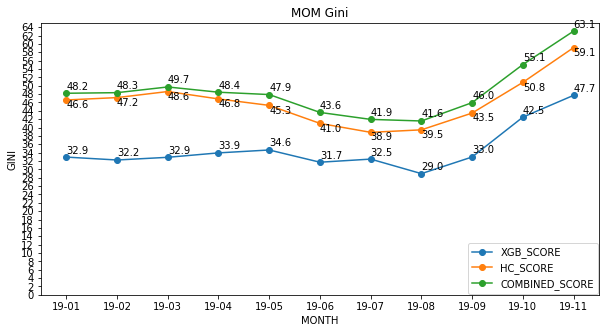

In [9]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(gini_df["MONTH"],gini_df["XGB_SCORE"], marker='o', scaley = False, label = "XGB_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["RISK_SCORE"], marker='o', scaley = False, label = "HC_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE"], marker='o', scaley = False, label= "COMBINED_SCORE")

for i, txt in enumerate(gini_df["XGB_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["XGB_SCORE"][i]+0.9))
for i, txt in enumerate(gini_df["RISK_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["RISK_SCORE"][i]-1.9))
for i, txt in enumerate(gini_df["COMBINED_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE"][i]+0.9))

plt.legend(loc='lower right', borderaxespad=0.1)
plt.ylim(0,65)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,65,2))
ax1.set_title("MOM Gini")
plt.show()

# Lifts and Gains Chart

In [10]:
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))


In [11]:
def lift_and_gain_df(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob]+jitter(data[prob]), 10)
    grouped = data.groupby('bucket', as_index = False)
    liftstable = pd.DataFrame()
    liftstable['min_prob'] = grouped.min()[prob]
    liftstable['max_prob'] = grouped.max()[prob]
    liftstable['total']   = grouped.count()[target]
    liftstable['bads']   = round(grouped.sum()[target])
    liftstable['goods'] = round(grouped.sum()['target0'])
    liftstable['%base'] = (liftstable.total / data[target].count())
    liftstable = liftstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    liftstable['cum%_base'] = (liftstable.total / data[target].count()).cumsum()
    liftstable['%bads'] = (liftstable['bads'] / data[target].sum())
    liftstable['%goods'] = (liftstable['goods'] / data['target0'].sum())
    liftstable['cum%_bads']=(liftstable['bads'] / data[target].sum()).cumsum()
    liftstable['cum%_goods']=(liftstable['bads'] / data['target0'].sum()).cumsum()

    
    liftstable['lift'] = np.round(liftstable['%bads']/liftstable['%base'] , 3)
    liftstable['cum_lift'] = np.round(liftstable['cum%_bads']/liftstable['cum%_base'] , 3)

    #Formating
    liftstable['%base']= liftstable['%base'].apply('{0:.2%}'.format)
    liftstable['%bads']= liftstable['%bads'].apply('{0:.2%}'.format)
    liftstable['%goods']= liftstable['%goods'].apply('{0:.2%}'.format)
    liftstable['cum%_bads']= liftstable['cum%_bads'].apply('{0:.2%}'.format)
    liftstable['cum%_goods']= liftstable['cum%_goods'].apply('{0:.2%}'.format)
    liftstable['cum%_base'] = liftstable['cum%_base'].apply('{0:.2%}'.format)

    liftstable.index = range(1,11)
    liftstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 13)
    return(liftstable)

In [12]:
#cum%_bads is gain_score
combined_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=COMBINED_SCORE)
risk_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=RISK_SCORE)
final_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=FINAL_SCORE)

### Cumulative Lift Chart 

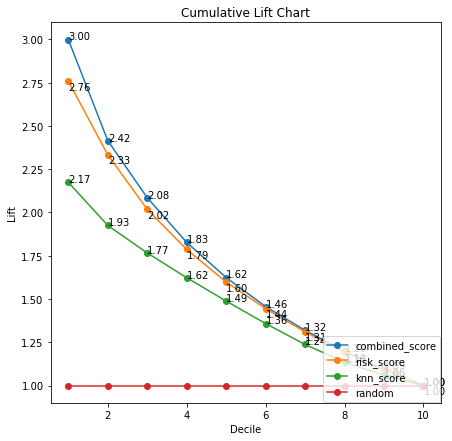

In [13]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,combined_score_lift["cum_lift"], label = 'combined_score', marker='o')
for i, txt in enumerate(combined_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (combined_score_lift.index[i], combined_score_lift["cum_lift"][i+1]))

ax1.plot(combined_score_lift.index,risk_score_lift["cum_lift"], label = 'risk_score', marker='o')
for i, txt in enumerate(risk_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], risk_score_lift["cum_lift"][i+1]-0.05))

ax1.plot(combined_score_lift.index,final_score_lift["cum_lift"], label = 'knn_score', marker='o')
for i, txt in enumerate(final_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], final_score_lift["cum_lift"][i+1]))

ax1.plot(np.arange(1,11,1),[1,1,1,1,1,1,1,1,1,1], label = 'random', marker='o')

plt.legend(loc='lower right', borderaxespad=0.1)
plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Cumulative Lift Chart")
plt.show()    


## Gains Chart

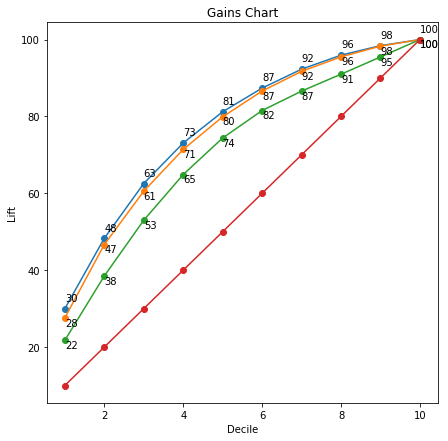

In [46]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]], label = 'combined_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (combined_score_lift.index[i], [float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]][i]+2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]], label = 'risk_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]][i]-2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in final_score_lift["cum%_bads"]], label = 'knn_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in final_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in final_score_lift["cum%_bads"]][i]-2))

ax1.plot(np.arange(1,11,1),np.arange(10,101,10), label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Gains Chart")
plt.show()    


# Kolomogorov Smirnov chart

In [51]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob]+jitter(data[prob]), 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['bads']   = grouped.sum()[target]
    kstable['goods'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['%bads'] = (kstable.bads / data[target].sum()).apply('{0:.2%}'.format)
    kstable['%goods'] = (kstable.goods / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum%_bads']=(kstable.bads / data[target].sum()).cumsum()
    kstable['cum%_goods']=(kstable.goods / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum%_bads']-kstable['cum%_goods'], 3) * 100

    #Formating
    kstable['cum%_bads']= kstable['cum%_bads'].apply('{0:.2%}'.format)
    kstable['cum%_goods']= kstable['cum%_goods'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    print("KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

KS is 34.8% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.102903,0.760654,8804,50407,29.99%,8.96%,29.99%,8.96%,21.0
2,0.072506,0.102903,5375,53836,18.31%,9.57%,48.30%,18.52%,29.8
3,0.054929,0.072505,4183,55028,14.25%,9.78%,62.55%,28.30%,34.2
4,0.042635,0.054929,3095,56116,10.54%,9.97%,73.09%,38.27%,34.8
5,0.033476,0.042635,2384,56827,8.12%,10.10%,81.22%,48.37%,32.8
6,0.026507,0.033476,1806,57404,6.15%,10.20%,87.37%,58.57%,28.8
7,0.021133,0.026507,1447,57765,4.93%,10.26%,92.30%,68.84%,23.5
8,0.016821,0.021133,1068,58143,3.64%,10.33%,95.94%,79.17%,16.8
9,0.012841,0.016821,730,58481,2.49%,10.39%,98.42%,89.56%,8.9


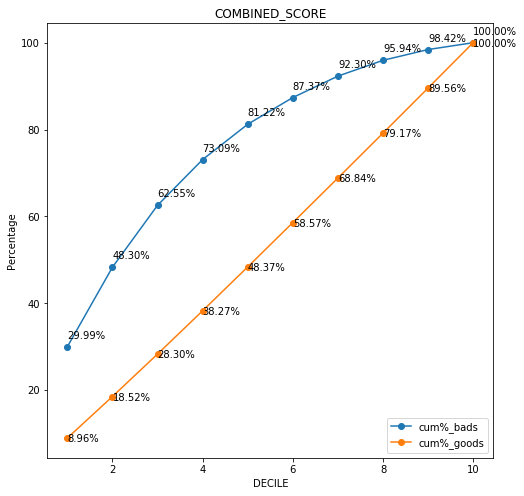

In [48]:
ks_df=ks(data=df,target=TARGET, prob=COMBINED_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("COMBINED_SCORE")
    
ks_df

KS is 33.1% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.052598,0.659028,8100,51111,27.59%,9.08%,27.59%,9.08%,18.5
2,0.036177,0.052597,5597,53614,19.07%,9.53%,46.66%,18.61%,28.1
3,0.027352,0.036177,4076,55135,13.89%,9.80%,60.55%,28.41%,32.1
4,0.021568,0.027352,3193,56018,10.88%,9.95%,71.42%,38.36%,33.1
5,0.017379,0.021568,2488,56723,8.48%,10.08%,79.90%,48.44%,31.5
6,0.014083,0.017378,1971,57240,6.71%,10.17%,86.61%,58.61%,28.0
7,0.011411,0.014083,1501,57709,5.11%,10.25%,91.73%,68.87%,22.9
8,0.009076,0.011411,1105,57920,3.76%,10.29%,95.49%,79.16%,16.3
9,0.006734,0.009076,826,58528,2.81%,10.40%,98.30%,89.56%,8.7


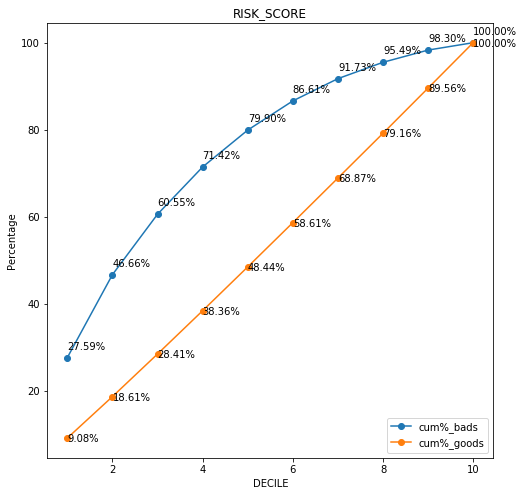

In [49]:
ks_df=ks(data=df,target=TARGET, prob=RISK_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads",marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("RISK_SCORE")
    
ks_df

KS is 26.200000000000003% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.618062,0.685308,6383,52828,21.74%,9.39%,21.74%,9.39%,12.4
2,0.593614,0.618062,4920,54291,16.76%,9.65%,38.50%,19.03%,19.5
3,0.566088,0.593614,4252,54959,14.48%,9.77%,52.99%,28.80%,24.2
4,0.531435,0.566075,3497,55714,11.91%,9.90%,64.90%,38.70%,26.2
5,0.506448,0.531435,2777,56434,9.46%,10.03%,74.36%,48.73%,25.6
6,0.462960,0.506448,2089,57122,7.12%,10.15%,81.48%,58.88%,22.6
7,0.451809,0.462960,1504,57707,5.12%,10.25%,86.60%,69.13%,17.5
8,0.451261,0.451261,1278,57934,4.35%,10.29%,90.96%,79.43%,11.5
9,0.451261,0.451261,1307,57904,4.45%,10.29%,95.41%,89.72%,5.7


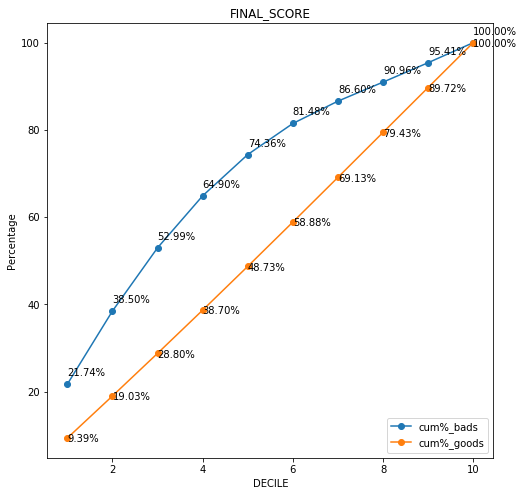

In [52]:
ks_df=ks(data=df,target=TARGET, prob=FINAL_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("FINAL_SCORE")

ks_df

# Log Loss

# Concordant – Discordant ratio

# Precision Recall Curve

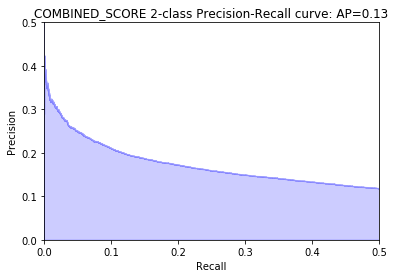

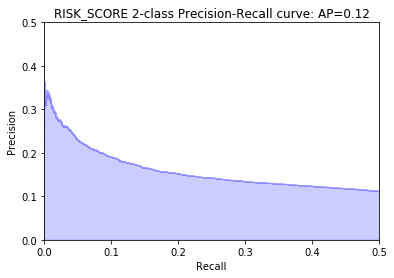

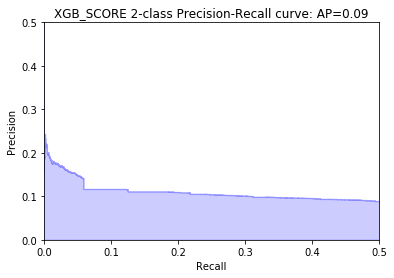

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score

for x in [COMBINED_SCORE,RISK_SCORE,FINAL_SCORE]:
    precision, recall, _ = precision_recall_curve(df[TARGET],df[x])

    step_kwargs = ({'step': 'post'}
                   #if 'step' in signature(plt.fill_between).parameters
                   #else {}
                  )
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 0.5])
    plt.xlim([0.0, 0.5])
    plt.title(x+' 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(df[TARGET],df[x])))
    plt.show()
    # calculate precision-recall AUC
    auc_pr = auc(recall, precision)
    #print(x +" AUC for precision-recall :",auc_pr)
    print("\n")
